# Multiple Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("../csvFiles/student_performance.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student ID             40 non-null     int64  
 1   Days Studied           40 non-null     int64  
 2   Hours Studied per Day  40 non-null     float64
 3   Exam Percentage        40 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.4 KB


In [3]:
data.head()

,Student ID,Days Studied,Hours Studied per Day,Exam Percentage
0,1,11,2.9,70.85
1,2,54,6.5,101.75
2,3,42,6.3,95.45
3,4,10,6.8,76.20
4,5,44,6.4,93.60


In [4]:
data.describe()

,Student ID,Days Studied,Hours Studied per Day,Exam Percentage
count,40.000000,40.000000,40.000000,40.000000
mean,20.500000,33.425000,4.077500,82.453750
std,11.690452,16.752937,1.927199,9.719485
min,1.000000,10.000000,1.000000,64.950000
25%,10.750000,18.750000,2.100000,74.825000
50%,20.500000,33.500000,3.950000,80.750000
75%,30.250000,47.000000,6.125000,91.737500
max,40.000000,60.000000,6.900000,101.750000


In [5]:
data.columns

Index(['Student ID', 'Days Studied', 'Hours Studied per Day',
       'Exam Percentage'],
      dtype='object')

In [6]:
x = data[['Days Studied', 'Hours Studied per Day']]
y = data[['Exam Percentage']]
print(x.head())
print(y.head())

   Days Studied  Hours Studied per Day
0            11                    2.9
1            54                    6.5
2            42                    6.3
3            10                    6.8
4            44                    6.4
   Exam Percentage
0            70.85
1           101.75
2            95.45
3            76.20
4            93.60


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=8)

In [9]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [10]:
regressor.score(x_test, y_test)

0.906394764309595

Prediction on new data...

In [11]:
daysStudied = 9
hoursStudiedPerDay = 4
regressor.predict([[daysStudied, hoursStudiedPerDay]])

array([[71.53468209]])

In [12]:
print(regressor.intercept_)
print(regressor.coef_)

[60.85216372]
[[0.46397719 1.62668092]]


In [13]:
print(regressor.intercept_ + regressor.coef_[0][0] * daysStudied + regressor.coef_[0][1] * hoursStudiedPerDay)

[71.53468209]


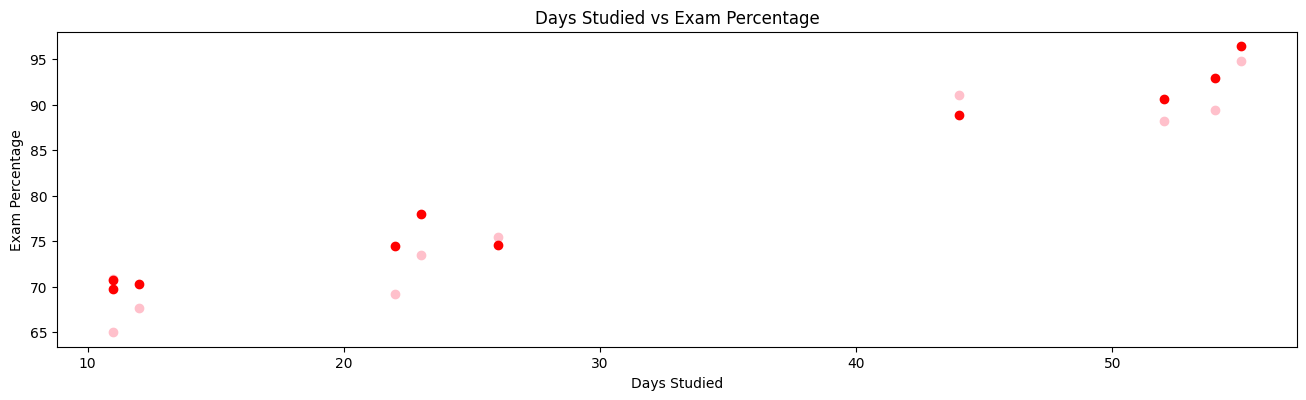

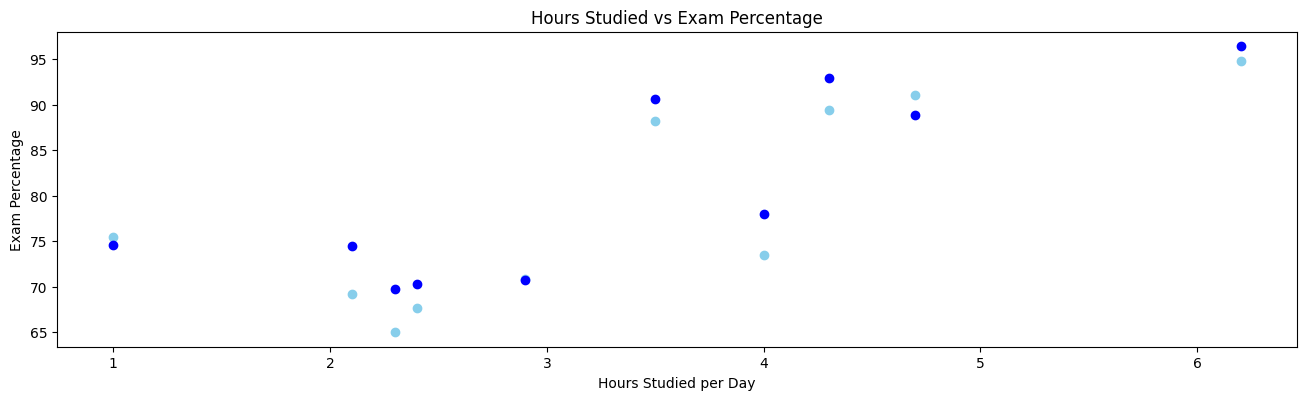

In [14]:
plt.figure(figsize=(16, 9))
plt.subplot(211)
plt.title("Days Studied vs Exam Percentage")
plt.xlabel("Days Studied")
plt.ylabel("Exam Percentage")
# plt.scatter(x['Days Studied'], y, color='pink')
plt.scatter(x_test['Days Studied'], y_test, color='pink')
plt.scatter(x_test['Days Studied'], regressor.predict(x_test), color='r')

plt.figure(figsize=(16, 9))
plt.subplot(212)
plt.title("Hours Studied vs Exam Percentage")
plt.xlabel("Hours Studied per Day")
plt.ylabel("Exam Percentage")
# plt.scatter(x['Hours Studied per Day'], y, color='skyblue')
plt.scatter(x_test['Hours Studied per Day'], y_test, color='skyblue')
plt.scatter(x_test['Hours Studied per Day'], regressor.predict(x_test), color='b')

plt.show()

# New Data Set

In [15]:
data = pd.read_csv("../csvFiles/mtcars.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


In [16]:
data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [17]:
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


array([[<Axes: title={'center': 'mpg'}>, <Axes: title={'center': 'cyl'}>,
        <Axes: title={'center': 'disp'}>],
       [<Axes: title={'center': 'hp'}>, <Axes: title={'center': 'drat'}>,
        <Axes: title={'center': 'wt'}>],
       [<Axes: title={'center': 'qsec'}>, <Axes: title={'center': 'vs'}>,
        <Axes: title={'center': 'am'}>],
       [<Axes: title={'center': 'gear'}>,
        <Axes: title={'center': 'carb'}>, <Axes: >]], dtype=object)

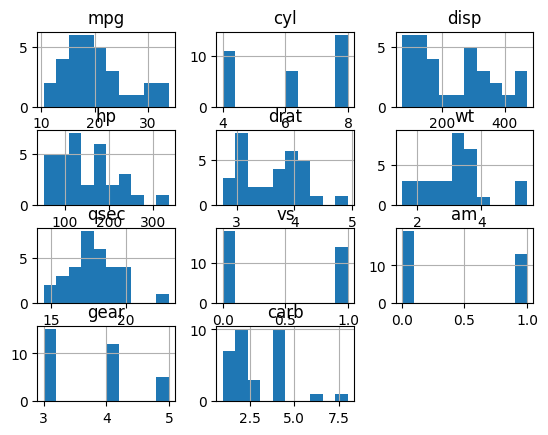

In [19]:
data.hist()

In [20]:
import seaborn as sns

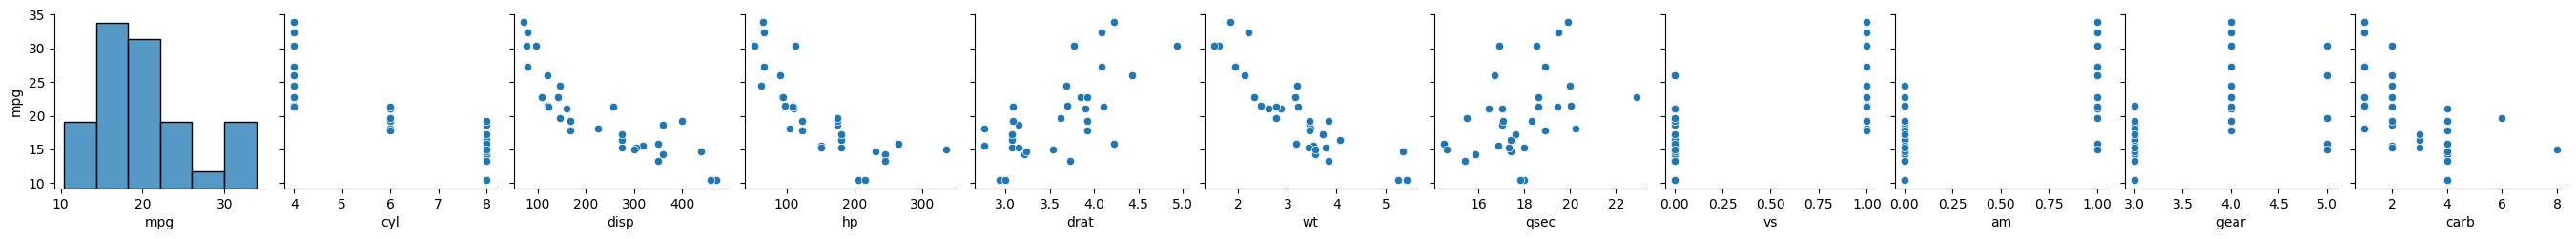

In [21]:
sns.pairplot(data, x_vars=data.columns, y_vars=["mpg"])
plt.show()

In [22]:
data.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

<Axes: >

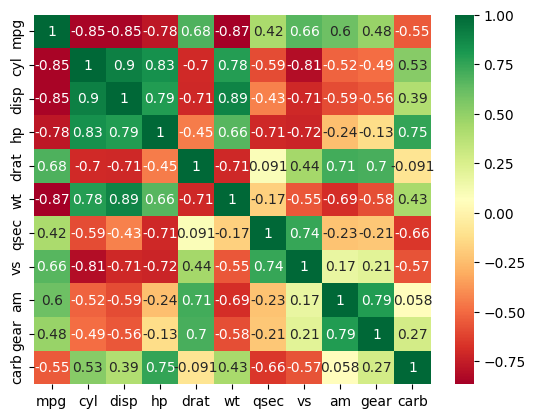

In [41]:
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

In [50]:
# x = data[['cyl', 'disp', 'hp', 'drat', 'wt', 'vs']] # based on graphs
# can also find correlation by data.corr()
x = data[['cyl', 'disp', 'hp', 'drat', 'wt']]
y = data[['mpg']]

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=8)

In [52]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [53]:
regressor.score(x_test, y_test)

0.897502313189984

TypeError: string indices must be integers

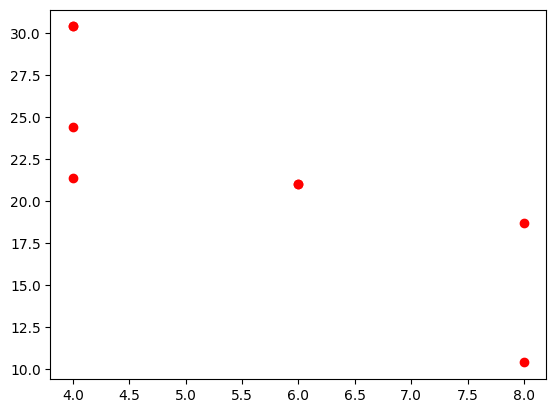

In [54]:
plt.scatter(x_test['cyl'], y_test, color='r')
plt.plot(sorted(x_test['cyl']), regressor.predict(sorted(x_test, key=lambda x:x['cyl'])), color='b')

In [42]:
x_test.columns

Index(['cyl', 'disp', 'hp', 'drat', 'wt'], dtype='object')